<a href="https://colab.research.google.com/github/vaidande/Cotton-Disease-Prediction-InceptionResNetV2-Xception-InceptionV3-VGG16/blob/main/Cotton_Disease_Prediction_InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [5]:
train_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))

Found 1951 files belonging to 4 classes.
Found 324 files belonging to 4 classes.


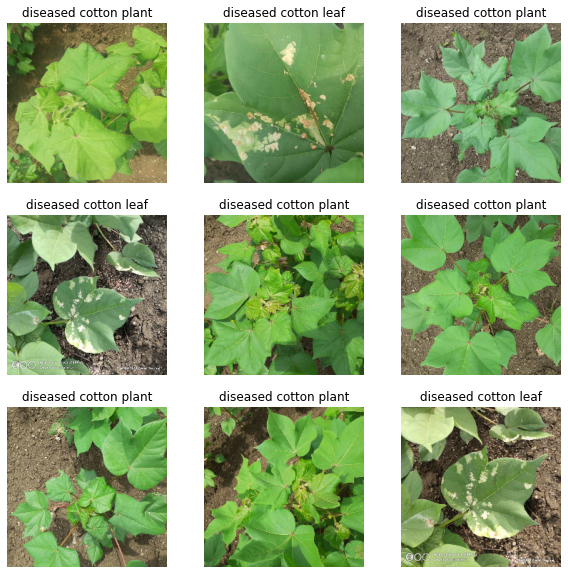

In [6]:
#visualizing some images..
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_dataset = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_dataset = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [9]:
base_model = InceptionResNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 2s 0us/step


In [10]:
#freezing model..existing weights and biases will be NOT be trained!
base_model.trainable = False

In [11]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [12]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/train/*')

In [13]:
x = MaxPooling2D()(base_model.output)
x = Flatten()(x)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnet.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [17]:
initial_epochs = 10
r = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=initial_epochs, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
61/61 [==============================] - 528s 8s/step - loss: 1.1709 - accuracy: 0.6135 - val_loss: 0.5607 - val_accuracy: 0.7840

Epoch 00001: val_accuracy improved from -inf to 0.78395, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnet.h5
Epoch 2/10
61/61 [==============================] - 39s 629ms/step - loss: 0.5848 - accuracy: 0.7826 - val_loss: 0.3836 - val_accuracy: 0.8611

Epoch 00002: val_accuracy improved from 0.78395 to 0.86111, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnet.h5
Epoch 3/10
61/61 [==============================] - 38s 629ms/step - loss: 0.3752 - accuracy: 0.8645 - val_loss: 0.5260 - val_accuracy: 0.8364

Epoch 00003: val_accuracy did not improve from 0.86111
Epoch 4/10
61/61 [==============================] - 38s 622ms/step - loss: 0.3047 - accuracy: 0.8954 - val_loss: 0.3977 - val_accuracy: 0.8642

Epoch 00004: val_accuracy improved from 0.86111 

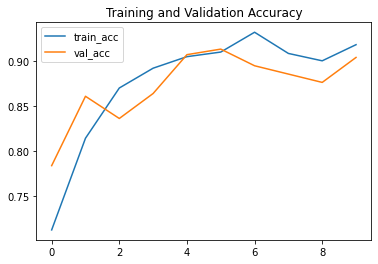

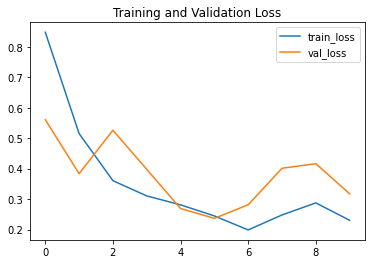

<Figure size 432x288 with 0 Axes>

In [18]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [19]:
#unfreezing base_model..
base_model.trainable = True

In [20]:
#freezing base_model except bottom layers..
for layer in base_model.layers:
  if layer.name == 'block14_sepconv1':
    break
  layer.trainable = False
  print('Layer '+layer.name+' frozen!')

Layer input_1 frozen!
Layer conv2d frozen!
Layer batch_normalization frozen!
Layer activation frozen!
Layer conv2d_1 frozen!
Layer batch_normalization_1 frozen!
Layer activation_1 frozen!
Layer conv2d_2 frozen!
Layer batch_normalization_2 frozen!
Layer activation_2 frozen!
Layer max_pooling2d frozen!
Layer conv2d_3 frozen!
Layer batch_normalization_3 frozen!
Layer activation_3 frozen!
Layer conv2d_4 frozen!
Layer batch_normalization_4 frozen!
Layer activation_4 frozen!
Layer max_pooling2d_1 frozen!
Layer conv2d_8 frozen!
Layer batch_normalization_8 frozen!
Layer activation_8 frozen!
Layer conv2d_6 frozen!
Layer conv2d_9 frozen!
Layer batch_normalization_6 frozen!
Layer batch_normalization_9 frozen!
Layer activation_6 frozen!
Layer activation_9 frozen!
Layer average_pooling2d frozen!
Layer conv2d_5 frozen!
Layer conv2d_7 frozen!
Layer conv2d_10 frozen!
Layer conv2d_11 frozen!
Layer batch_normalization_5 frozen!
Layer batch_normalization_7 frozen!
Layer batch_normalization_10 frozen!
Lay

In [21]:
base_lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = base_lr/10), metrics=['accuracy'])

In [22]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

r_fine = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=total_epochs,
                        initial_epoch = r.epoch[-1],
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 10/20
61/61 [==============================] - 49s 667ms/step - loss: 0.1746 - accuracy: 0.9340 - val_loss: 0.2815 - val_accuracy: 0.9167

Epoch 00010: val_accuracy improved from 0.91358 to 0.91667, saving model to /content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnet.h5
Epoch 11/20
61/61 [==============================] - 39s 629ms/step - loss: 0.1257 - accuracy: 0.9583 - val_loss: 0.2749 - val_accuracy: 0.9074

Epoch 00011: val_accuracy did not improve from 0.91667
Epoch 12/20
61/61 [==============================] - 38s 621ms/step - loss: 0.1402 - accuracy: 0.9579 - val_loss: 0.2690 - val_accuracy: 0.9136

Epoch 00012: val_accuracy did not improve from 0.91667
Epoch 13/20
61/61 [==============================] - 38s 623ms/step - loss: 0.1613 - accuracy: 0.9496 - val_loss: 0.2372 - val_accuracy: 0.9167

Epoch 00013: val_accuracy did not improve from 0.91667
Epoch 14/20
61/61 [==============================] - 38s 619ms/step - loss: 0.1318 - accurac

In [23]:
acc += r_fine.history['accuracy']
val_acc += r_fine.history['val_accuracy']

loss += r_fine.history['loss']
val_loss += r_fine.history['val_loss']

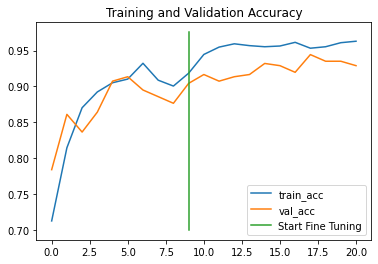

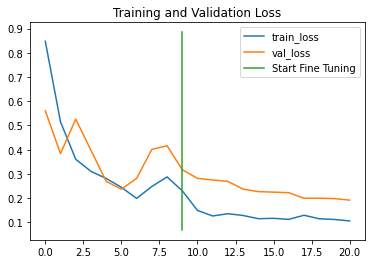

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [25]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/cottondisease_inceptionresnet.h5')

In [41]:
test_image = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/Cotton Disease/test/test data comp files/d (396)_compressed.jpg', target_size=(224,224))

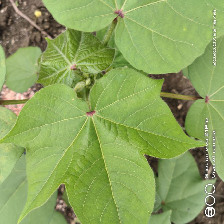

In [42]:
test_image

In [43]:
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [44]:
a=np.argmax(result, axis=1)

In [45]:
if a==0:
  print("The leaf is diseased cotton leaf!")
elif a==1:
  print("The leaf is diseased cotton plant!")
elif a==2:
  print("The leaf is fresh cotton leaf.")
else:
  print("The leaf is fresh Cotton Plant.")

The leaf is fresh cotton leaf.
